# 01 Data Exploration
- Load and clean data
- Exploratory Data Analysis (EDA)
- Visualizations: price, returns, volatility
- Outlier detection, missing values
- Stationarity tests (ADF)
- Value at Risk (VaR), Sharpe Ratio

Data loaded for: TSLA, BND, SPY

TSLA missing values:
Date                0
Price               0
Close               0
High                0
Low                 0
Open                0
Volume              0
Adj Close           0
Return              0
LogReturn           0
Volatility          0
RollingMean         0
RollingStd          0
z_score             0
Open_scaled         0
High_scaled         0
Low_scaled          0
Close_scaled        0
Adj Close_scaled    0
Volume_scaled       0
dtype: int64

TSLA statistics:
                                Date        Close         High          Low  \
count                           2516  2516.000000  2516.000000  2516.000000   
mean   1970-01-01 00:00:00.000001278   132.825244   135.843466   129.678579   
min    1970-01-01 00:00:00.000000021     9.578000    10.331333     9.403333   
25%    1970-01-01 00:00:00.000000649    19.275001    19.632833    18.831000   
50%    1970-01-01 00:00:00.000001278    99.872334   102.410664    97.599998   
7

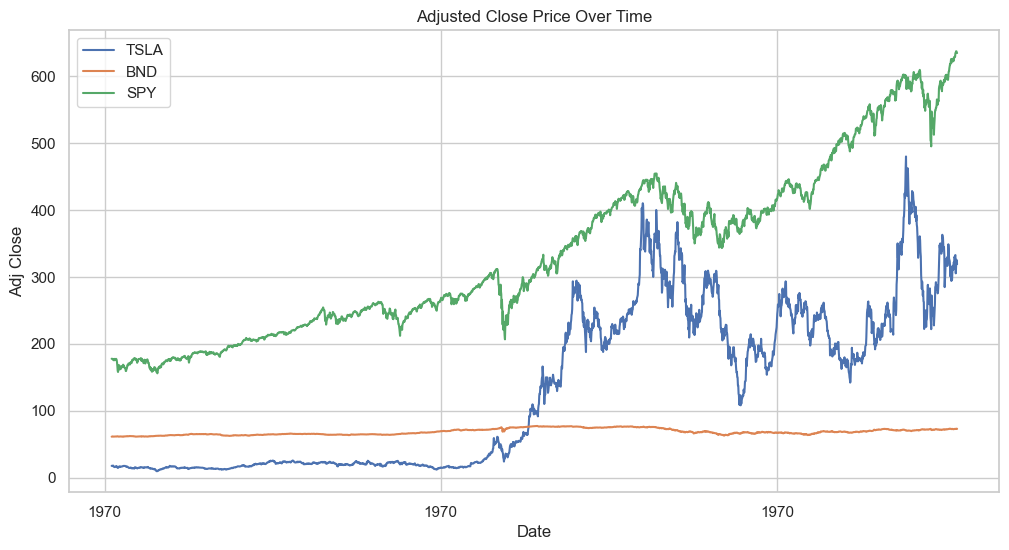

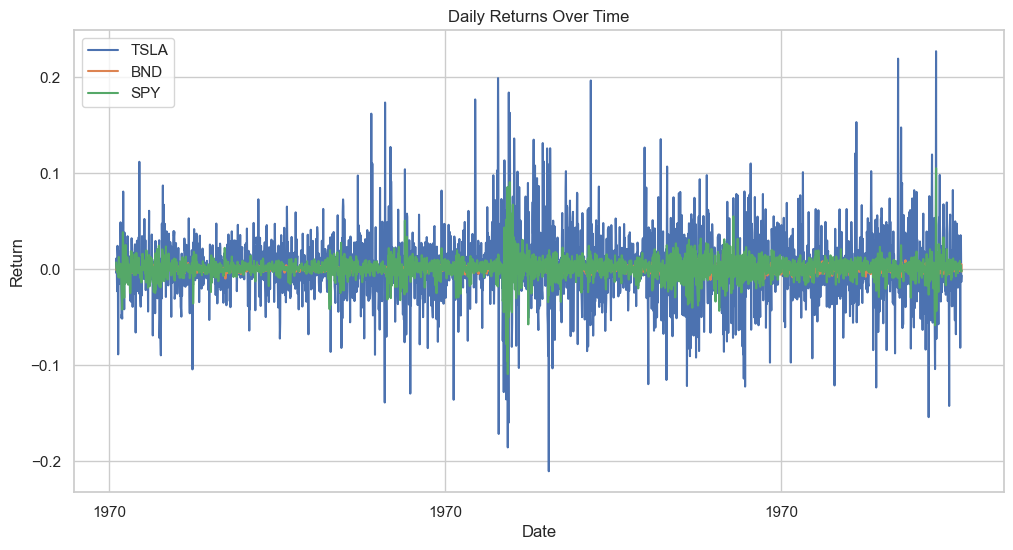

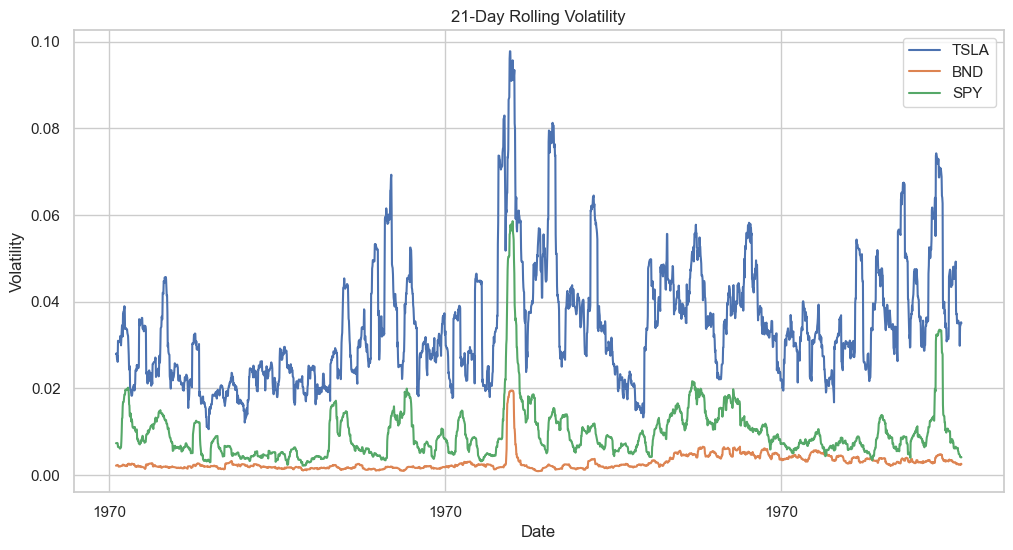

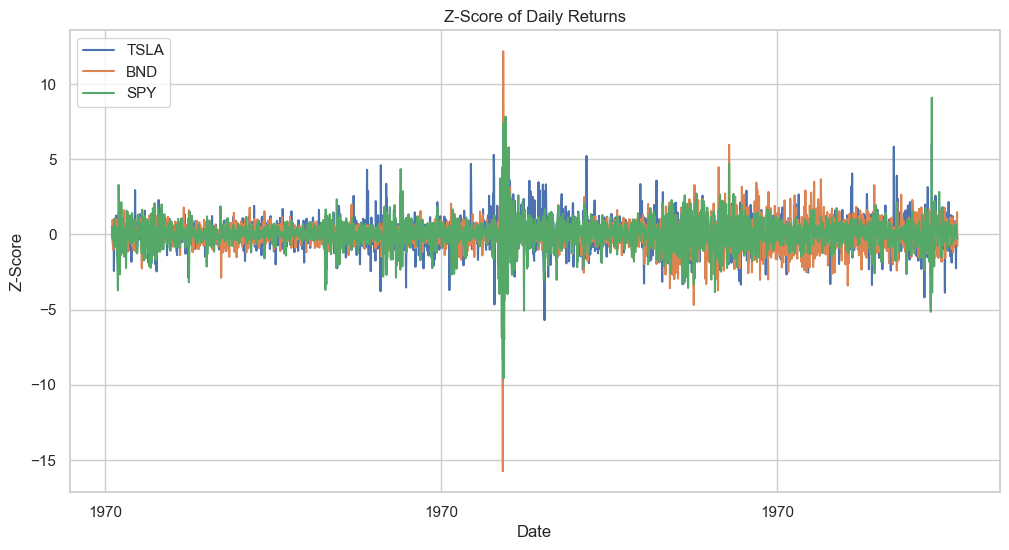


ADF Test for TSLA (Adj Close):
ADF Statistic: -1.4231, p-value: 0.5712
Non-stationary
ADF Test for TSLA (Return):
ADF Statistic: -34.5191, p-value: 0.0000
Stationary

ADF Test for BND (Adj Close):
ADF Statistic: -1.4939, p-value: 0.5365
Non-stationary
ADF Test for BND (Return):
ADF Statistic: -34.5191, p-value: 0.0000
Stationary

ADF Test for BND (Adj Close):
ADF Statistic: -1.4939, p-value: 0.5365
Non-stationary
ADF Test for BND (Return):
ADF Statistic: -9.8512, p-value: 0.0000
Stationary

ADF Test for SPY (Adj Close):
ADF Statistic: 0.6590, p-value: 0.9890
Non-stationary
ADF Test for SPY (Return):
ADF Statistic: -16.1854, p-value: 0.0000
Stationary

TSLA VaR (95%): -0.0547, Sharpe Ratio: 0.78

BND VaR (95%): -0.0049, Sharpe Ratio: 0.34

SPY VaR (95%): -0.0174, Sharpe Ratio: 0.79
ADF Statistic: -9.8512, p-value: 0.0000
Stationary

ADF Test for SPY (Adj Close):
ADF Statistic: 0.6590, p-value: 0.9890
Non-stationary
ADF Test for SPY (Return):
ADF Statistic: -16.1854, p-value: 0.0000
Sta

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Set plot style
sns.set(style='whitegrid')

# Load datasets
assets = ['TSLA', 'BND', 'SPY']
data = {}
for asset in assets:
    df = pd.read_csv(f'../data/processed/{asset}_processed.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    data[asset] = df
print('Data loaded for:', ', '.join(data.keys()))

# Check for missing values and show basic statistics
for asset, df in data.items():
    print(f'\n{asset} missing values:')
    print(df.isnull().sum())
    print(f'\n{asset} statistics:')
    print(df.describe())

# Visualize closing prices
plt.figure(figsize=(12,6))
for asset, df in data.items():
    plt.plot(df['Date'], df['Adj Close'], label=asset)
plt.title('Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend()
plt.show()

# Calculate and plot daily returns
plt.figure(figsize=(12,6))
for asset, df in data.items():
    plt.plot(df['Date'], df['Return'], label=asset)
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()

# Rolling volatility (21-day std)
plt.figure(figsize=(12,6))
for asset, df in data.items():
    plt.plot(df['Date'], df['Volatility'], label=asset)
plt.title('21-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Outlier detection: plot z-scores
plt.figure(figsize=(12,6))
for asset, df in data.items():
    plt.plot(df['Date'], df['z_score'], label=asset)
plt.title('Z-Score of Daily Returns')
plt.xlabel('Date')
plt.ylabel('Z-Score')
plt.legend()
plt.show()

# Augmented Dickey-Fuller test for stationarity
for asset, df in data.items():
    print(f'\nADF Test for {asset} (Adj Close):')
    result = adfuller(df['Adj Close'])
    print(f'ADF Statistic: {result[0]:.4f}, p-value: {result[1]:.4f}')
    print('Stationary' if result[1] < 0.05 else 'Non-stationary')
    print(f'ADF Test for {asset} (Return):')
    result = adfuller(df['Return'].dropna())
    print(f'ADF Statistic: {result[0]:.4f}, p-value: {result[1]:.4f}')
    print('Stationary' if result[1] < 0.05 else 'Non-stationary')

# Value at Risk (VaR) and Sharpe Ratio
risk_metrics = {}
for asset, df in data.items():
    returns = df['Return'].dropna()
    var_95 = np.percentile(returns, 5)
    sharpe = returns.mean() / returns.std() * np.sqrt(252)
    risk_metrics[asset] = {'VaR_95': var_95, 'Sharpe': sharpe}
    print(f'\n{asset} VaR (95%): {var_95:.4f}, Sharpe Ratio: {sharpe:.2f}')
